In [223]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from datetime import datetime, date
%matplotlib inline

In [38]:
plt.style.use('ggplot')

In [3]:
log = pd.read_csv('z84flight.csv',usecols=['Time','GPSSpd(kmh)','Curr(A)','VFAS(V)','A4(V)','GAlt(m)',
                                          'Alt(m)','RSSI(dB)'])

In [4]:
log.head()

,Time,A4(V),VFAS(V),Curr(A),Alt(m),RSSI(dB),GPSSpd(kmh),GAlt(m)
0,14:19:20.770,4.08,16.33,0.3,0.9,100,1.0,196.5
1,14:19:21.700,4.08,16.33,0.3,0.9,100,0.7,196.0
2,14:19:22.710,4.08,16.34,0.3,0.9,100,0.4,196.4
3,14:20:08.320,3.89,15.58,5.7,77.1,86,54.6,275.8
4,14:20:09.320,3.89,15.58,5.7,79.2,86,54.6,277.1


In [5]:
log.describe()


,A4(V),VFAS(V),Curr(A),Alt(m),RSSI(dB),GPSSpd(kmh),GAlt(m)
count,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000
mean,3.562870,14.266534,2.835906,124.956516,81.757856,41.212523,327.381654
std,0.221743,0.887173,1.253965,39.565948,4.486849,13.874528,42.237885
min,3.090000,12.380000,0.200000,0.000000,58.000000,0.000000,196.000000
25%,3.420000,13.680000,2.200000,100.200000,80.000000,29.800000,300.975000
50%,3.560000,14.240000,2.700000,126.100000,82.000000,39.400000,329.500000
75%,3.760000,15.050000,3.100000,146.625000,86.000000,51.100000,349.000000
max,4.080000,16.340000,15.100000,257.400000,100.000000,87.400000,460.300000


A4(V) - value of single battery cel in Volt

VFAS(V)	- value of all battery cels in Volt

Curr(A)	 - current consumed at the moment in Ampere

RSSI(dB) - Received Signal Strength Indicator measurement of the power present in a received radio signal (Decibel)

GPSSpd(kmh) - Speed of plane based on GPS reading (km/h)



In [6]:
len(log)

2164

In [12]:
timestart = log['Time'].iloc[0]
timestart


'14:19:20.770'

In [11]:
timeend = log['Time'].iloc[-1]
timeend

'14:56:13.720'

In [13]:
start = datetime.strptime(timestart, '%H:%M:%S.%f' )

In [15]:
end = datetime.strptime(timeend, '%H:%M:%S.%f' )

FlightTime = (end - start)
print('Flight time was : ', str(FlightTime) , ' minutes')

In [17]:
f'flight time: {end-start}'

'flight time: 0:36:52.950000'

In [6]:
current = pd.read_csv('z84flight.csv',usecols=['Curr(A)'])

In [7]:
current.head()

,Curr(A)
0,0.3
1,0.3
2,0.3
3,5.7
4,5.7


Median of current :  2.7
Average of current 2.835905730129374
Mode current (orange color)    Curr(A)
0      2.3


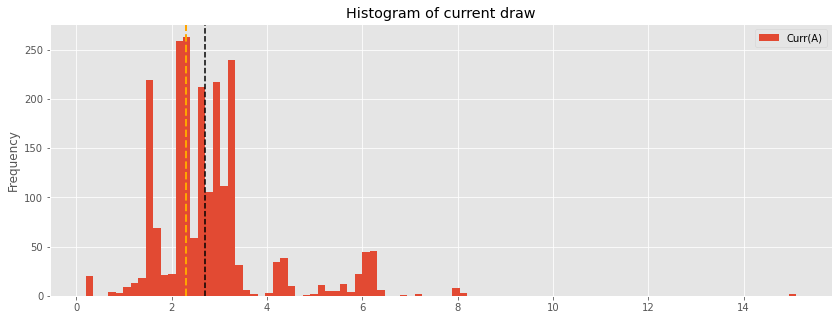

In [8]:
current.plot.hist(bins=95,title='Histogram of current draw',figsize=(14,5))

plt.axvline(float(current.median()),linestyle='dashed',color='black')
plt.axvline(2.3, linewidth=2, color='orange',linestyle='dashed')

print('Median of current : ',float(current.median()))
print('Average of current',float(current.mean()))
print('Mode current (orange color)',current.mode())


In [9]:
speed= pd.read_csv('z84flight.csv',usecols=['GPSSpd(kmh)'])

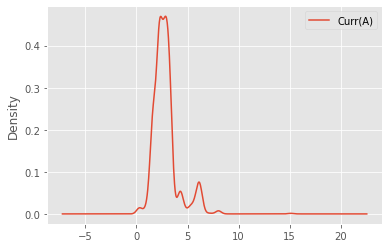

In [10]:
current.plot.kde()


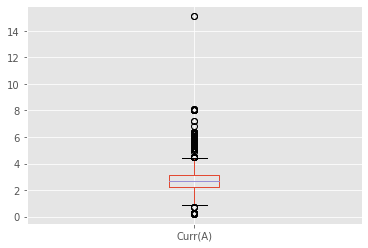

In [205]:
current.plot.box()


Median of speed is GPSSpd(kmh)    39.4
dtype: float64
Average speed is 41.21


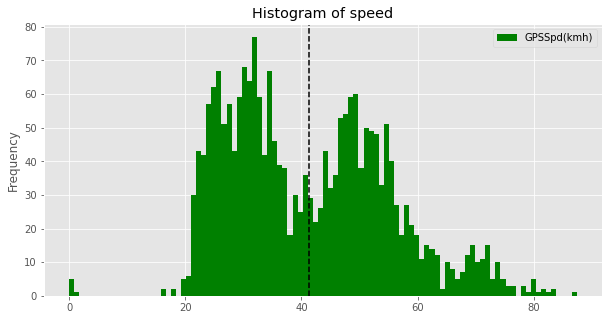

In [79]:
speed= pd.read_csv('z84flight.csv',usecols=['GPSSpd(kmh)'])
mean = float(speed.mean())
mode = float(speed.median())

print('Median of speed is',speed.median())
print('Average speed is',round(mean,2))
speed.plot.hist(bins=100,title='Histogram of speed',
                color ='green',figsize=(10,5))
plt.axvline(mean, color='k', linestyle='dashed')


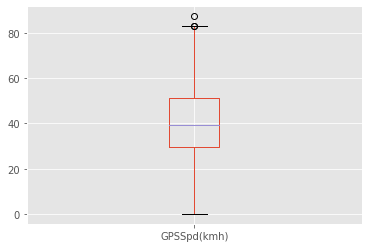

In [110]:
speed.plot.box()

In [81]:
speedcurrent = pd.read_csv('z84flight.csv',usecols=['Time','GPSSpd(kmh)','Curr(A)'],index_col='Time')
speed = speedcurrent.groupby(['GPSSpd(kmh)'])
curr = speedcurrent.groupby(['Curr(A)'])

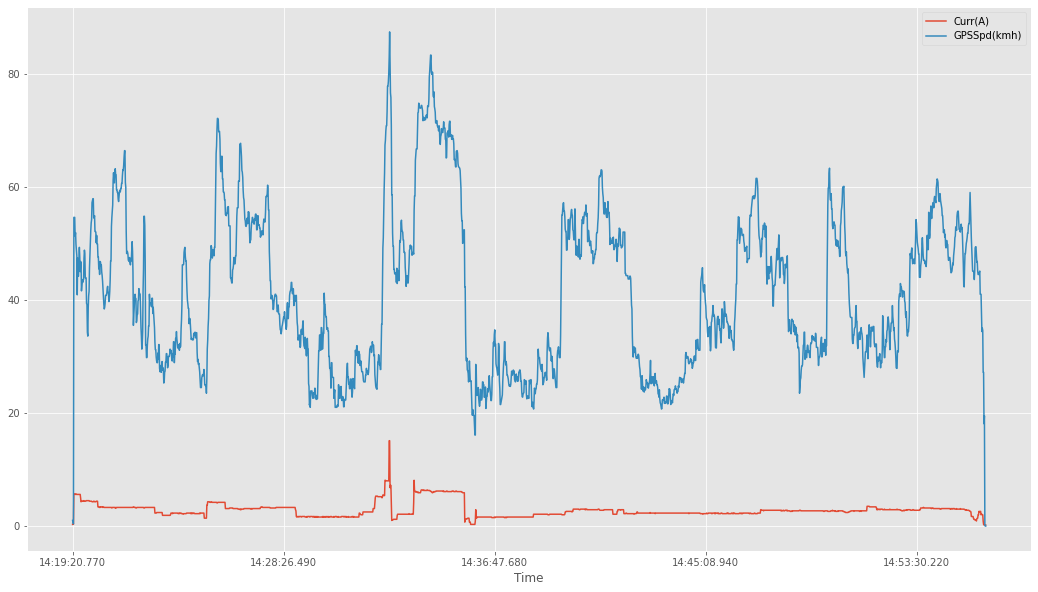

In [78]:
speedcurrent.plot(figsize=(18,10))

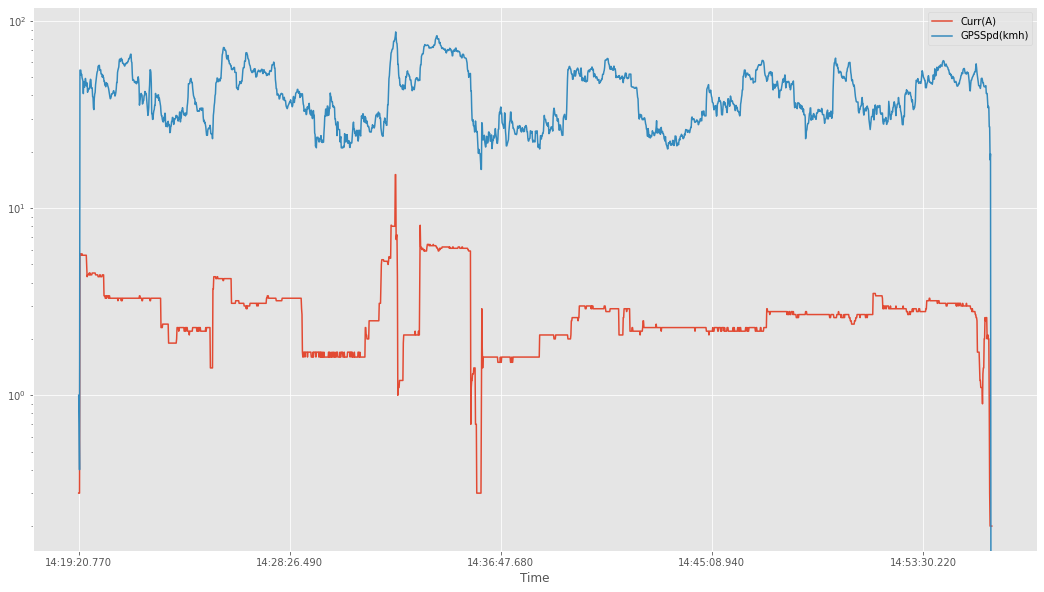

In [99]:
speedcurrent.plot(figsize=(18,10),logy=True)

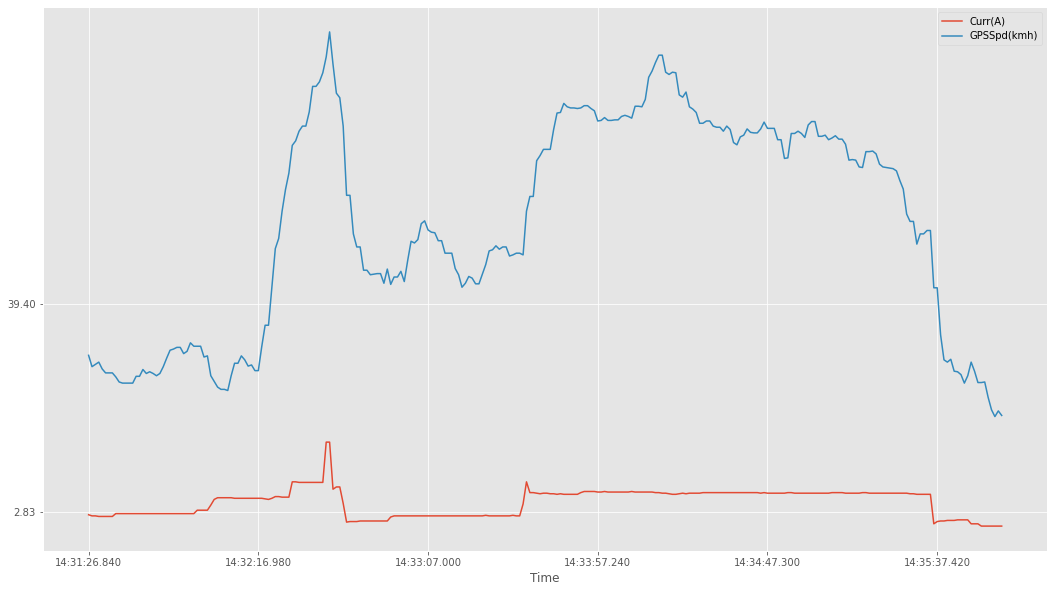

In [75]:
speedcurrent[680:950].plot(figsize=(18,10),yticks=[2.83,39.4])

(15.0, 50.0, 1.0, 4.0)

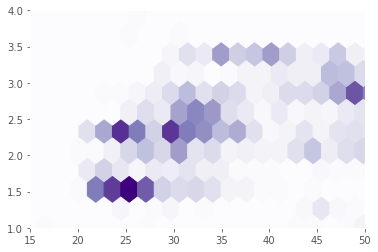

In [115]:
speed = pd.read_csv('z84flight.csv',usecols=['GPSSpd(kmh)'])
curr = pd.read_csv('z84flight.csv',usecols=['Curr(A)'])
plt.hexbin(speed, curr, gridsize=50,cmap='Purples')
plt.axis([15, 50, 1, 4])

In [190]:
signal = pd.read_csv('z84flight.csv',usecols=['Time','RSSI(dB)'],index_col='Time')
signal.mode()

,RSSI(dB)
0,82


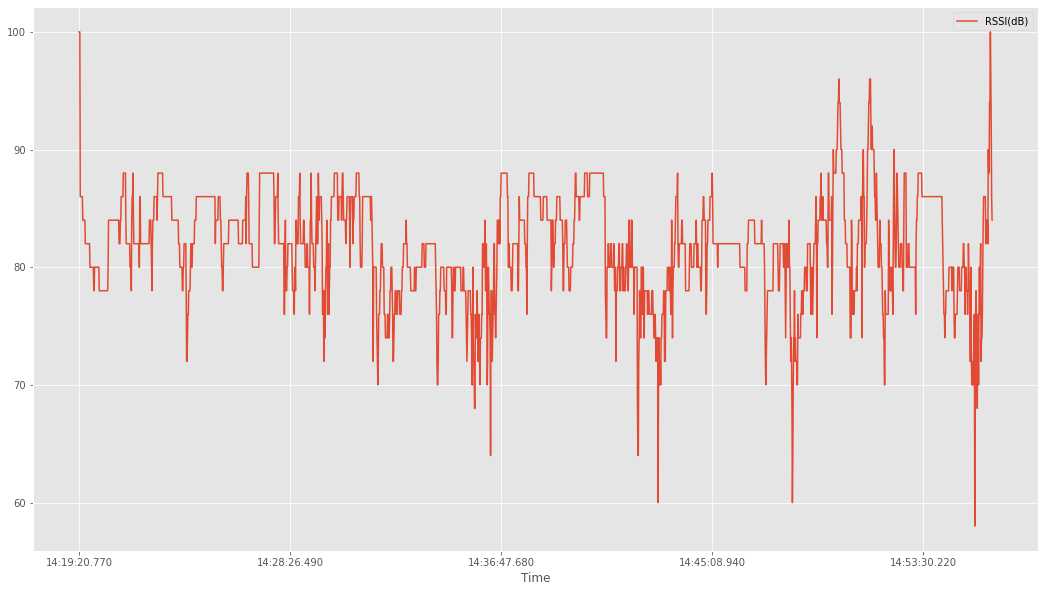

In [187]:
signal.plot(figsize=(18,10))

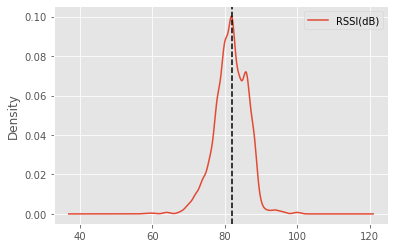

In [191]:
signal.plot.kde()
plt.axvline(82, color='k', linestyle='dashed')


Alt(m)    124.956516
dtype: float64


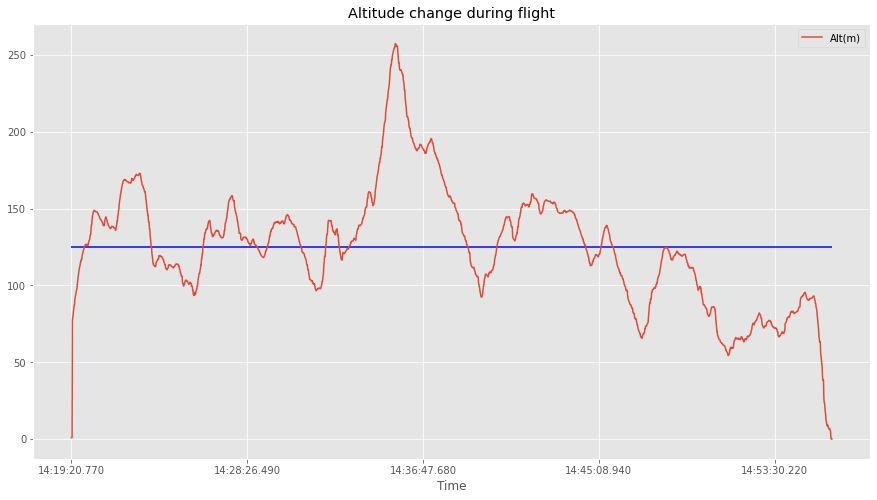

In [210]:
altitude = pd.read_csv('z84flight.csv',usecols=['Time','Alt(m)'],index_col='Time')
print(altitude.mean())
altitude.plot(figsize=(15,8),title='Altitude change during flight')
plt.hlines(float(altitude.mean()),xmin=0,xmax=len(altitude), color='b', linestyle='-',label='average altitude')


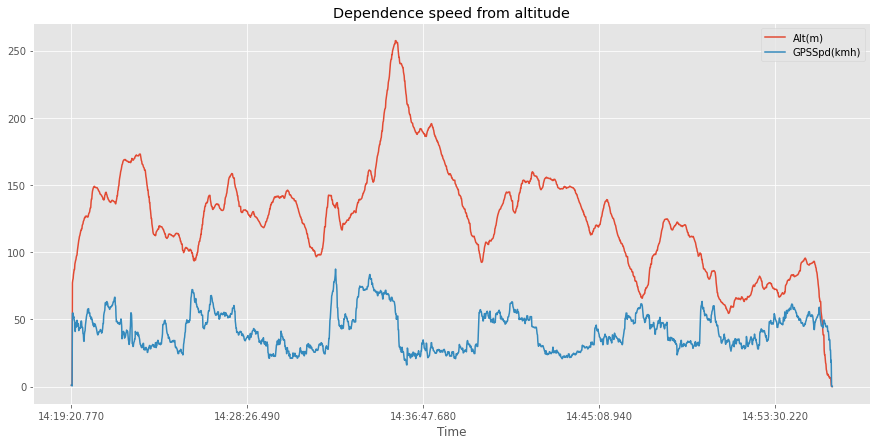

In [211]:
altitudespeed = pd.read_csv('z84flight.csv',usecols=['Time','Alt(m)','GPSSpd(kmh)'],index_col='Time')
altitudespeed.plot(figsize=(15,7),title='Dependence speed from altitude')

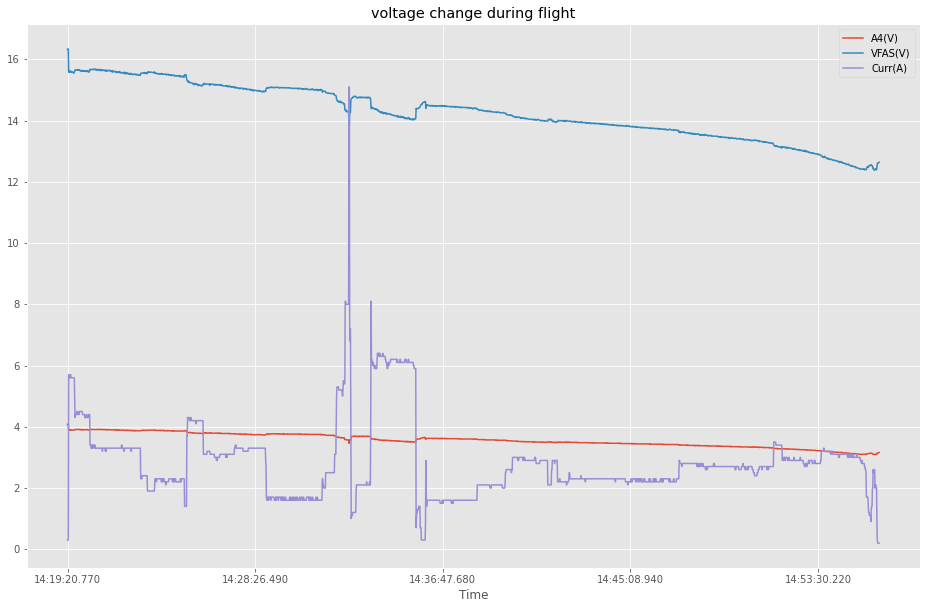

In [8]:
voltage = pd.read_csv('z84flight.csv',usecols=['Time','VFAS(V)','Curr(A)','A4(V)'],index_col='Time')
voltage.plot(figsize=(16,10),title='voltage change during flight')


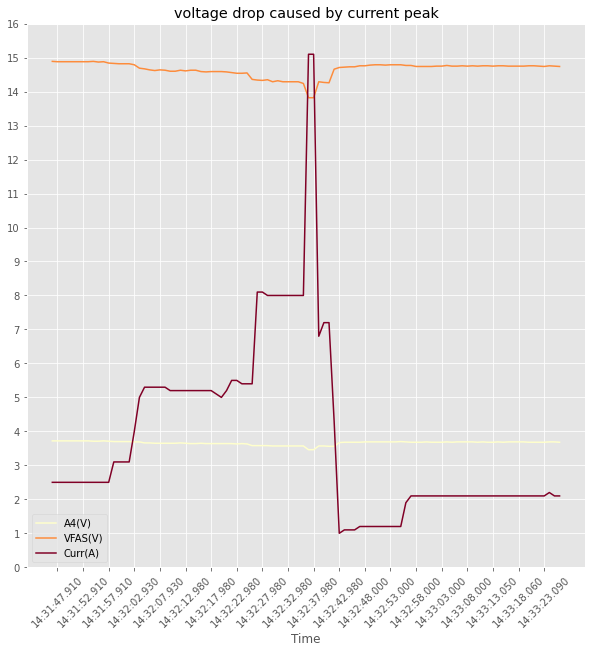

In [40]:
voltage[700:800].plot(figsize=(10,10),title='voltage drop caused by current peak',rot=45,colormap='YlOrRd',yticks=range(0,17,1),
                      xticks=range(1, 100, 5))


In [148]:
galt = pd.read_csv('z84flight.csv',usecols=['GAlt(m)'])
balt = pd.read_csv('z84flight.csv',usecols=['Alt(m)'])

In [149]:
galt = pd.DataFrame(galt['GAlt(m)'].unique())
balt = pd.DataFrame(balt['Alt(m)'].unique())

In [150]:
balt.rename(columns={0:'Baro_altitude'},inplace=True)
galt.rename(columns={0:"GPS_altitude"},inplace=True)

In [151]:
balt.head()

,Baro_altitude
0,0.9
1,77.1
2,79.2
3,80.3
4,83.4


In [152]:
galts = galt.sort_values(by=["GPS_altitude"],ignore_index=True)


In [153]:
balts= balt.sort_values(by=['Baro_altitude'],ignore_index=True)

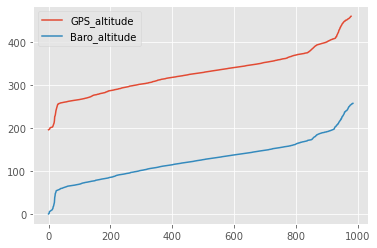

In [154]:
ax = galts.plot()
balts.plot(ax=ax)

In [190]:
GPS = pd.read_csv('z84flight.csv',usecols=['GPS'])

In [191]:
GPS.head()


,GPS
0,50.022066 20.072121
1,50.022068 20.072123
2,50.022070 20.072126
3,50.023783 20.072618
4,50.023908 20.072585


In [192]:
SplitGPS = GPS['GPS'].str.split(" ",n=1,expand=True)

In [193]:
GPS['Latitude'] = SplitGPS[0]

In [194]:
GPS['Longitude']= SplitGPS[1]

In [195]:
GPS.drop(columns=['GPS'],inplace=True)


In [196]:
GPS.head()

,Latitude,Longitude
0,50.022066,20.072121
1,50.022068,20.072123
2,50.022070,20.072126
3,50.023783,20.072618
4,50.023908,20.072585


In [233]:
location = GPS.values.tolist()


In [260]:
from ipyleaflet import Map, AntPath, FullScreenControl

In [285]:

flightpath = AntPath( locations=location, dash_array=[1, 10],
    delay=1000,
    color='#999999',
    pulse_color='green')
mapka = Map(center=[50.0263, 20.0761],zoom=13.5)
mapka.add_layer(flightpath)
mapka.add_control(FullScreenControl())
mapka


Map(center=[50.0263, 20.0761], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…